# Blackjack Analysis

### Data from: https://www.kaggle.com/mojocolors/900000-hands-of-blackjack-results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

df = pd.read_csv("blackjack.csv")

df['game'] = 0
gameNumber = 0

for num in range(0,len(df)):
    if df['PlayerNo'][num] == 'Player1':
        gameNumber = gameNumber + 1
    df['game'][num] = gameNumber

# 25% of rows have an unfortunate error
# it looks like in cases where players only took 3 cards, many rows have an incorrect '0' in the 'card3' column and 
# instead put their 3rd card value in the 'card4' column
print(len(df[(df['card1']+df['card2']+df['card3']!=df['sumofcards'])&(df['card3']==0)]) / len(df))

# let's fix that
for num in range(0,len(df)):
    if (df['card3'][num] == 0) & (df['card4'][num] > 0):
        df['card3'][num] = df['card4'][num]
        df['card4'][num] = 0

df.to_csv("blackjack.csv", index=False)

In [113]:
def took3rdCard(value):
    if value > 0:
        return 1
    else:
        return 0

df['took3rdCard'] = df['card3'].apply(took3rdCard)
df['dealtook3rdCard'] = df['dealcard3'].apply(took3rdCard)

In [22]:
df[df['sumofcards']==20]['winloss'].value_counts() / len(df[df['sumofcards']==20]) * 100

Win     69.425068
Push    18.492507
Loss    12.082425
Name: winloss, dtype: float64

In [10]:
df.groupby('sumofcards').size() / len(df) * 100

sumofcards
8      0.000111
9      0.001333
10     0.003556
11     0.009000
12     2.633222
13     4.306556
14     4.216000
15     4.132667
16     4.041000
17    11.987222
18    12.366333
19    11.702667
20    16.311111
21    10.419222
22     5.029556
23     3.989778
24     3.475111
25     2.984667
26     2.390889
dtype: float64

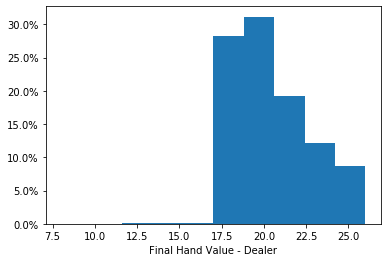

In [49]:
dealer = df.drop_duplicates('game')

data = [1000, 1000, 5000, 3000, 4000, 16000, 2000]

plt.hist(dealer['sumofdeal'], weights=np.ones(len(dealer['sumofcards'])) / len(dealer['sumofcards']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel("Final Hand Value - Dealer")
plt.show()

# For every possible hand value, what % of players take another card?

In [175]:
currentHandValue = []
hitMe = []

for num in range(0,100000):
    currentHandValue.append(df['ply2cardsum'][num])
    
    if df['card3'][num] > 0:
        hitMe.append(1)
    else:
        hitMe.append(0)
        continue # this player's game is done, move to next loop
        
    handValue = df['ply2cardsum'][num] + df['card3'][num]
    currentHandValue.append(handValue)
    
    if df['card4'][num] > 0:
        hitMe.append(1)
    else:
        hitMe.append(0)
        continue # this player's game is done, move to next loop
        
    handValue = handValue + df['card4'][num]
    currentHandValue.append(handValue)
    
    if df['card5'][num] > 0:
        hitMe.append(1)
    else:
        hitMe.append(0)
        
assert(len(currentHandValue) == len(hitMe))

hitMeData = pd.DataFrame({'hand_value':currentHandValue, 'tookCard': hitMe})

avg = hitMeData.groupby('hand_value').mean()
avg.reset_index().to_csv("hand_value_averages.csv", index=False)

Text(0.5, 0, 'Hand Value - Players')

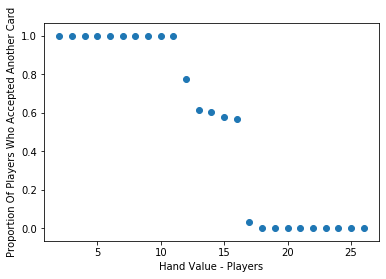

In [179]:
plt.scatter(avg.index, avg['tookCard'])
plt.ylabel("Proportion Of Players Who Accepted Another Card")
plt.xlabel("Hand Value - Players")

# For any initial hand value, what % of players took a third card?

In [ ]:
round1 = first2cards[['card1','card2','win']]

round1['handValue'] = round1['card1'] + round1['card2']
del round1['card1']
del round1['card2']

round1 = round1.groupby('handValue').mean().reset_index()

first3cards = data.groupby(['card1','card2','card3']).mean().reset_index()

round2 = first3cards[['card1','card2','card3','win']]

round2['handValue'] = round2['card1'] + round2['card2'] + round2['card3']
del round2['card1']
del round2['card2']
del round2['card3']

round2 = round2.groupby('handValue').mean().reset_index()

first4cards = data.groupby(['card1','card2','card3','card4']).mean().reset_index()

round3 = first4cards[['card1','card2','card3','card4','win']]

round3['handValue'] = round3['card1'] + round3['card2'] + round3['card3'] + round3['card4']
del round3['card1']
del round3['card2']
del round3['card3']
del round3['card4']

round3 = round3.groupby('handValue').mean().reset_index()

# convert win column to boolean
df['win'] = df['winloss'].map({'Loss': 0, 'Win': 1})

# remove ties
noTies = df[df['winloss']!='Push']

# subset to rows of interest
data = noTies[['card1','card2','card3','card4','card5','win']]

def tookCard(value):
    if value > 0:
        return 1
    else:
        return value
    
data['took3rdCard'] = data['card3'].apply(tookCard)
data['took4thCard'] = data['card4'].apply(tookCard)
data['took5thCard'] = data['card5'].apply(tookCard)

first2cards = data.groupby(['card1','card2']).mean().reset_index()

def choiceBreaks(card1Value, card2Value):
    subset = first2cards[(first2cards['card1']==card1Value) & (first2cards['card2']==card2Value)]
    
    print(str(subset['took3rdCard'].mean()) + "% took a 3rd card")
    
choiceBreaks(10,5)

# Compute Win % At Every Stage

In [226]:
first5cards = data.groupby(['card1','card2','card3','card4','card5']).mean().reset_index()

round4 = first5cards[['card1','card2','card3','card4','card5','win']]

round4['handValue'] = round4['card1'] + round4['card2'] + round4['card3'] + round4['card4'] + round4['card5']
del round4['card1']
del round4['card2']
del round4['card3']
del round4['card4']
del round4['card5']

round4 = round4.groupby('handValue').mean().reset_index()

round1.columns = ['handValue', 'round1']
round2.columns = ['handValue', 'round2']
round3.columns = ['handValue', 'round3']
round4.columns = ['handValue', 'round4']

winProbs = round1.merge(round2,how="left").merge(round3,how="left").merge(round4,how="left")

winProbs.to_csv("winProbs.csv", index=False)

In [229]:
winProbs

,handValue,round1,round2,round3,round4
0,2,0.416667,NaN,NaN,NaN
1,3,0.313545,NaN,NaN,NaN
2,4,0.333427,NaN,NaN,NaN
3,5,0.355557,NaN,NaN,NaN
4,6,0.335753,0.309598,NaN,NaN
5,7,0.312735,0.331543,0.310345,NaN
6,8,0.387797,0.407459,0.308753,0.000000
7,9,0.542263,0.458155,0.432033,0.433333
8,10,0.577803,0.527649,0.498696,0.148611
9,11,0.558612,0.598157,0.609428,0.348485
